![test](../notebooks/images/header3.png)

# Workshop goals
* Loss functions
* Feedforward networks and backpropagation
* Activation functions
* Deep learning
* How to size your model
* Rock-paper-scissors predictor

# Wireless connection info:
* network: ASK_Guest
* username: Guest@ask.com
* password: @sk.infO (capital "O")

# How to get and open this file:
1. `git pull`
1. `docker-compose build`
1. `docker-compose up`
1. Open `localhost:8888` in a browser and paste in the token

# To stop docker when you are done:
1. `control-c` in the terminal window to stop Jupyter
1. `docker-compose down`

# Making predictions

All the networks we looked at last time were **feedforward** networks, in which the inputs on the left are used to calculate the final outputs by walking through the neural network graph. Specifically, feedforward networks don't have any circular paths. This is also sometimes called a *Directed Acyclic Graph* or *DAG*.

We use **forward propagation** to calculate the output values.

1. Start with the input values on the left-hand side ($X_n$).
1. The input to a node in the second layer is the weighted sum of the inputs.
1. The output of a node in the second layer is found by using the activation function on the weighted sum.
1. Repeat until you reach the output layer. 

<img src="../notebooks/images/1hiddenlayer.png" alt="drawing" width="600"/>

# Loss functions

The above prediction algorithm doesn't say anything about obtaining the weights between nodes, although that is pretty obviously a key component of a good neural network! Of course we can make predictions with any random set of weights, but good predictions require training the network. In order to train the network we have to first understand when the network is making good predictions. That requires a **loss function**. Very similar to linear or logistic regressions, and other ML algorithms, the loss function is an equation that measures how far our prediction is from the true answer, summed up for all of our observations. Then the training or fitting of the algorithm becomes an exercise in minimizing the loss function.

[Keras documention for loss functions](https://keras.io/losses/)

For example, for a regression problem we usually use **mean-squared error** (MSE), just like linear regression:

$$
\Large
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i-y_{pred})^2}
$$

The sum here is over all the observations we are predicting. Depending on circumstances this can be a test set or a single batch during training. If we have a multi-node output, we also have to sum over all the output nodes. Classification tasks have different loss functions I'll talk about a little bit later. 

# Training the network

Given an input observation, a set of weights and the network architecture, we use **forward propagation** to calculate the network output and therefore the value of the loss function.

There is another procedure, called **backpropagation** that is use to modify the weights of the network to lower the loss function. As the name implies, we use work backwards through the network, using the error at each layer to calculate the error at the previous layer, all the way back to the inputs. 

We then use the calculated errors, as well as the derivatives of the activation functions to adjust the weights in each layer.

This is a very hand-wavey and woefully incomplete description of backpropagation. I wish we had more time to delve into this deeply but I the focus of the class to be more on actually building networks.

It's probably best to leave links to resources here. I highly suggest reading some of these.

1. Chapter six in https://www.deeplearningbook.org/
1. Another online textbook: http://neuralnetworksanddeeplearning.com/chap2.html

One note: the error in each layer is dependent on the error in the previous layer. As these tend to become small, the changes made in each successive layer working backwards become smaller. Thus layers near the input in a deep network tend to train slowly.

# Activation functions

[Keras documention for activation functions](https://keras.io/activations/)

### Why do we need activation functions:

In the previous session we introduced neural networks as a generalization of logistic regression. In the language of deep learning, a logistic regression node uses a sigmoid activation function. There are other activation functions that we can use in certain circumstances.

Activation functions have several purposes. The most import one is that activation functions introduce *non-linearity* into the neural network. If we simply used the weighted sum input as the output for all nodes the output would just be a linear combination of the input features, effectively just a complicated linear regression. We want the network to be able to learn more complicated relationships, so our activation functions must be non-linear.

Some are similar in shape to the sigmoid, such as tanh. Of the dozen or so available activations in Keras, there are few that are important enough to describe in a little more detail.

1. Sigmoid - we already discussed this one. It's the familiar logistic regression shape. It outputs a single value between 0 and 1.
1. Softmax - a generalization of the sigmoid that can handle multi class outputs.
1. ReLu (rectified linear output) - this is a very special activation function that deserves its own section.


### Relu

ReLu is defined by:

$$
\Large
f(x) = max(0, x)
$$

Much like another activation function called softplus, relu can output values from 0 to $+\infty$. It has some huge advantages which make this currently the most popular activation function.

1. In the backpropagation algorithm we calculate many derivatives of the activation functions. Since the derivative of relu is either 0 or 1 (except at x = 0), this is very easy computationally. I found a source that says that model training is 6 times faster with relu than some other activation functions.
1. Retains non-linearity.
1. Avoids the vanishing gradient problem.
1. One potential issue: your network can get into a state where relu neurons "die" or always output zero.

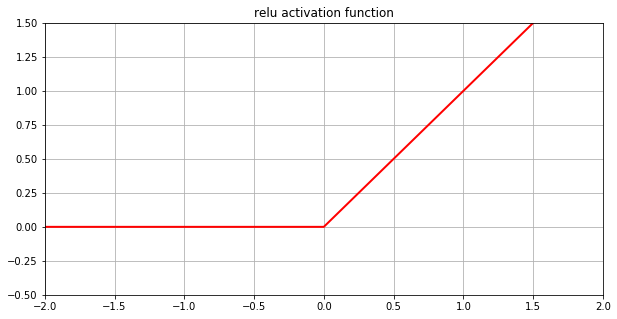

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(-2, 2, .01)
relu = np.maximum(0, x)

plt.figure(figsize=(10,5))
plt.plot(x, relu, color='red', lw=2)
plt.ylim((-.5,1.5))
plt.xlim(-2,2)
plt.grid(True)
plt.title("relu activation function")
plt.show()

# Choosing the correct loss function and output layer activation

Practically speaking, you choose these to match the machine learning task: 

| Problem Type                            | Activation           | Loss function  |
| --------------------------------------- |:-------------:| -----:|
| Binary Classifcation                    | sigmoid      |    binary_crossentropy |
| Multiclass, single-label classification | softmax | categorical_crossentropy |
| Multiclass, multilabel classification   | sigmoid | binary_crossentropy   |
| Regression to arbitrary values          | none    | mse
| Regression to values between 0 and 1    | sigmoid      | mse or binary_crossentropy |

This table comes from "Deeplearning with Python", Francois Chollet, pg. 114.

# Data preparation

1. Vectorization - we need to turn our data into tensors for Keras/Tensorflow. This can include one-hot encoding, like we did on the MNIST labels.
1. Normalization - as we saw in the example last week (dividing pixel values by 255), it's beneficial to have the input values be small (roughly 0-1). This is because we want to avoid saturating the activation functions. Neurons learn at a rate proportional to their derivative, and at very high or low values, most activation functions have very small derivatives.
1. Padding - in some cases, like time-series data, we won't always have observations of the same length. In this case we can add extra data to even out the sequence lengths.
1. Feature engineering - while one strength of deep learning is that it can figure out the important features for you, it can still be helpful to manually build good features. This can simplify the network or shorted training time. 

# Sizing a network

Much like any other machine learning model, a neural network can be underfit or overfit. One import factor in properly fitting a model is the complexity of the model. Simple models tend to be underfit; a too complex model will overfit the training data.

In the language of deep learning, model complexity is often called **capacity** and is related to number of parameters. The number of parameters can easily be in the millions for our models and even billions for larger models. Adding layers or adding more neurons to already existing layers increases the number of parameters. Too little capacity and your network won't be able to learn the desired function, too much capacity and it can overfit.

Unfortunately there is no equation to set the proper number of layers or the number of neurons in each layer. The recommended procedure for sizing a new model is to start with a small model. Then evaluate different architectures set the model size.

## Avoiding overfit models

1. Get more data! If possible, this is usually the best solution.
1. Don't over-train! Training a model for too many epochs leads to overfitting. The model tries to minimize training loss, we are actually more concerned with test or validation loss. The image below shows an example of this using data we'll use below. ![](images/val_loss2.png)
1. Reduce the network parameters.
1. Dropout is a regularization method where, in each training iteration, some fraction of neurons in a layer are randomly set to zero during training. This helps break up any learned non-significant patterns that the network might be learning. I've also heard it described as effectively training an ensemble model. In much the same way that a Random Forest model improves upon a Decision Tree, this effective ensemble can decrease variance error at the cost of a little increase in bias error. In Keras, dropout is implemented as a layer: `model.add(layer.Dropout(0.5))`
 
1. Regularize. By penalizing large weights we can force the model to be simpler. Keras has options for L1 and L2 regularization. This is exactly the same as regularization for linear or logistic regression. [Keras documention for regularization](https://keras.io/regularizers/)

# Rock paper scissors bot

In the next two sessions, we are going to build a bot that plays rock-paper-scissors against us. This will involve two neural networks.

1. The first network will attempt to predict a winning throw given what its opponent has thrown in the past. We'll build this one today.
2. The second network will take in images of the player's hand and classify them as either rock, paper, or scissors. We'll do this one in the next session using a new layer type called a convolution.

There will also be some other code to get the two working together that I will provide. 

### Exercise 1. Take a look at the RPS data below. numeric_to_throw_mapping = {1: Rock, 2: Paper, 3: Scissors}. What does zero represent? There aren't many moves in the dataset. It's probably prone to overfitting. Create a "complicated" model and a "simple" model. Train both and plot the validation loss against epoches of training for both. The example code below will help.

In [2]:
!head data/moves.csv
!wc -l data/moves.csv

1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2,2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2,2,2,1,3,3,2,1,0,0,0,0,0,0,0,0,0,3
2,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2,2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2,2,2,1,3,3,2,1,1,1,0,0,0,0,0,0,0,2
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
     180 data/moves.csv


### Example model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
dataset = np.loadtxt("data/moves.csv", delimiter=",")
X = dataset[:,0:18]
Y = to_categorical(dataset[:,18])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
model = Sequential()
model.add(Dense(128, input_dim=18, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
Total para

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=300, batch_size=50, validation_data=(x_test, y_test), verbose=0)

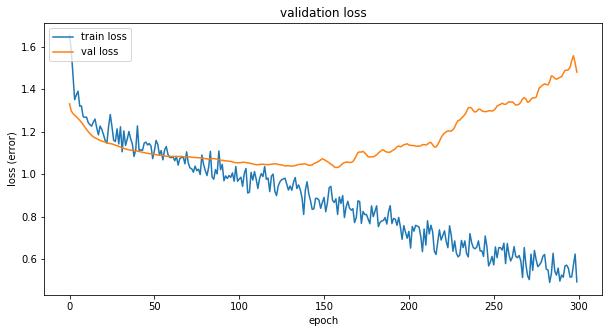

In [7]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss (error)')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

In [8]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Exercise 2. Try to find an appropriate network configuration. Does dropout help?

### Exercise 3. Pair up, play some RPS and add to the dataset.